In [141]:
#@title librerías
from google.colab import drive
import os
import math
from IPython.display import Image

In [115]:
#@title **Se carga el directorio google drive**
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
#@title **Archivos del directorio**
%cd /content/drive/MyDrive/YOLO_CUSTOM_DATASE
%pwd
%ls

/content/drive/MyDrive/YOLO_CUSTOM_DATASE
Change_name.ps1          classes.names  images_ori/  PyTorch-YOLOv3/  Tutorial/
Change_name_replace.ps1  images/        labels/      train.txt        valid.txt


In [127]:
%pwd
%rm train.txt
%rm valid.txt

rm: cannot remove 'train.txt': No such file or directory


In [128]:
#@title **Se genera el dataset de entrenamiento y de test**
Directorio = '/content/drive/MyDrive/YOLO_CUSTOM_DATASE'
train = 0.8
test = 0.2
Images = Directorio+'/images'
Total_images = 0
for m in os.listdir(Images):
  Total_images += 1

train = math.floor(Total_images * train)
test = Total_images - train
print('Total Imagenes',Total_images,'\nTotal imagenes entrenamiento',train, '\nTotal imagenes de test', test)

def GenDataSet(Directorio, train, test):
  it=0
  for m in os.listdir(Images):
    if it <= train:
      with open(Directorio + '/' + 'train.txt' , 'a') as writefile:    
        writefile.write('data/custom/images/'+ m +'\n')
    else:
      with open(Directorio + '/' + 'valid.txt' , 'a') as writefile:    
        writefile.write('data/custom/images/'+ m +'\n')  
    it+=1          
##Se generar los archivos de entrenamiento y test
GenDataSet(Directorio, train, test)

Total Imagenes 245 
Total imagenes entrenamiento 196 
Total imagenes de test 49


In [130]:
#@title Se carga la información en el directorio data/custon de YOLO
%cp -r /content/drive/MyDrive/YOLO_CUSTOM_DATASE/images /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/images
%cp -r /content/drive/MyDrive/YOLO_CUSTOM_DATASE/labels /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/labels
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/train.txt /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/train.txt
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/valid.txt /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/valid.txt
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/classes.names /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/classes.names

In [131]:
#@title Se regresa al directorio YOLO
%cd PyTorch-YOLOv3/
%ls

[Errno 2] No such file or directory: 'PyTorch-YOLOv3/'
/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom
classes.names  images/  labels/  train.txt  valid.txt


In [134]:
#@title validamos el directorio custom de YOLO
%cd data/custom/
%ls

[Errno 2] No such file or directory: 'data/custom/'
/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom
classes.names  images/  labels/  train.txt  valid.txt


In [135]:
#@title Regresamos el directorio raiz de YOLO
%cd ../..
%pwd

/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3


'/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3'

In [132]:
#@title Instalar los requerimientos:
!pip3 install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [136]:
#@title Se realiza entrenamiento del modelo original:
!python3 train.py --model_def config/yolov3-tiny_custom.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 1

Namespace(batch_size=8, checkpoint_interval=1, compute_map=False, data_config='config/custom.data', epochs=1, evaluation_interval=1, gradient_accumulations=2, img_size=416, model_def='config/yolov3-tiny_custom.cfg', multiscale_training=True, n_cpu=8, pretrained_weights='weights/yolov3-tiny.weights')
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/models.py:197: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:3

In [138]:
#@title Se realiza la predicción del modelo:
!python3 detect.py --model_def config/yolov3-tiny_custom.cfg --weights_path checkpoints/yolov3_ckpt_0.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.5

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.5, image_folder='data/samples/sample_custom/', img_size=416, model_def='config/yolov3-tiny_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/yolov3_ckpt_0.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.195507
	+ Batch 1, Inference Time: 0:00:00.170156

Saving images:
(0) Image: 'data/samples/sample_custom/ag_img_40.jpg'
	+ Label: helmet, Conf: 0.99223
(1) Image: 'data/samples/sample_custom/mg_img56.jpg'
	+ Label: helmet, Conf: 0.99619


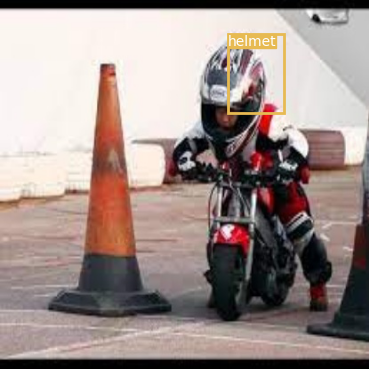

In [142]:
Image('output/ag_img_40.png')

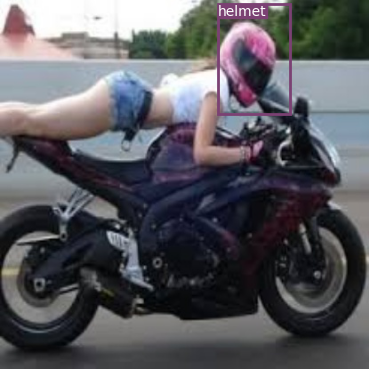

In [143]:
Image('output/mg_img56.png')

In [ ]:
!python3 plot_yolo_log.py logs/2021_11_20__16_43_29/events.out.tfevents.1637426612.1f90b2e6ce35.3028.0

In [144]:
##Crear YOLO + modulo de atención.
!python3 train.py --model_def config/yolov3-tiny_custom_se.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 1

Namespace(batch_size=8, checkpoint_interval=1, compute_map=False, data_config='config/custom.data', epochs=1, evaluation_interval=1, gradient_accumulations=2, img_size=416, model_def='config/yolov3-tiny_custom_se.cfg', multiscale_training=True, n_cpu=8, pretrained_weights='weights/yolov3-tiny.weights')
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/drive/My Drive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/models.py:197: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.

In [145]:
!python3 detect.py --model_def config/yolov3-tiny_custom_se.cfg --weights_path checkpoints/yolov3_ckpt_0.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.8

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/samples/sample_custom/', img_size=416, model_def='config/yolov3-tiny_custom_se.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/yolov3_ckpt_0.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.208522
	+ Batch 1, Inference Time: 0:00:00.176393

Saving images:
(0) Image: 'data/samples/sample_custom/ag_img_40.jpg'
	+ Label: helmet, Conf: 0.99974
(1) Image: 'data/samples/sample_custom/mg_img56.jpg'


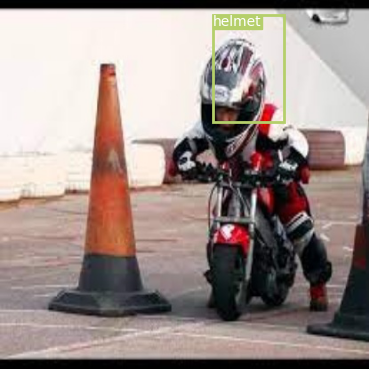

In [146]:
Image('output/ag_img_40.png')

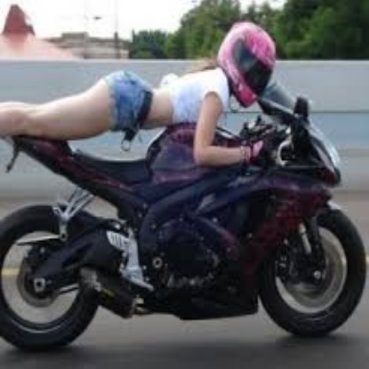

In [147]:
Image('output/mg_img56.png')